# Assignment 2: Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import cluster, datasets, mixture, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Data: Credit Card User Data
For this assignment, we use credit card data from 9000 users. Source: https://www.kaggle.com/arjunbhasin2013/ccdata

In [2]:
data = pd.read_csv("DATA/CC GENERAL.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Task 1: clean the data and perform a basic EDA

In [4]:
print (data.dtypes)
#data = data.drop(["CUST_ID"],axis=1)
#data = data.drop(["CASH_ADVANCE_TRX", "PURCHASES_TRX", "TENURE"],axis=1)
#data = data.drop(["PRC_FULL_PAYMENT"],axis=1)


CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


In [5]:
print(data.shape)
duplicated_data = data[data.duplicated()]
duplicated_data.shape

(8950, 18)


(0, 18)

In [6]:
print(data.count())
print(data.isnull().sum())
data = data.dropna()
print(data.count())

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8949
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVA

In [7]:
data.dtypes


CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

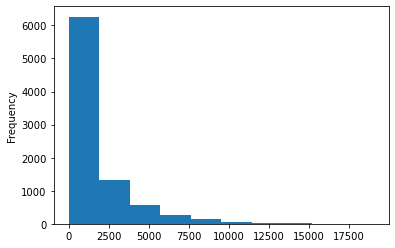

In [8]:
data["BALANCE"].plot(kind="hist")

In [9]:
print(data["BALANCE"].mean())
print(data["BALANCE"].median())

1601.2248927435173
916.855459


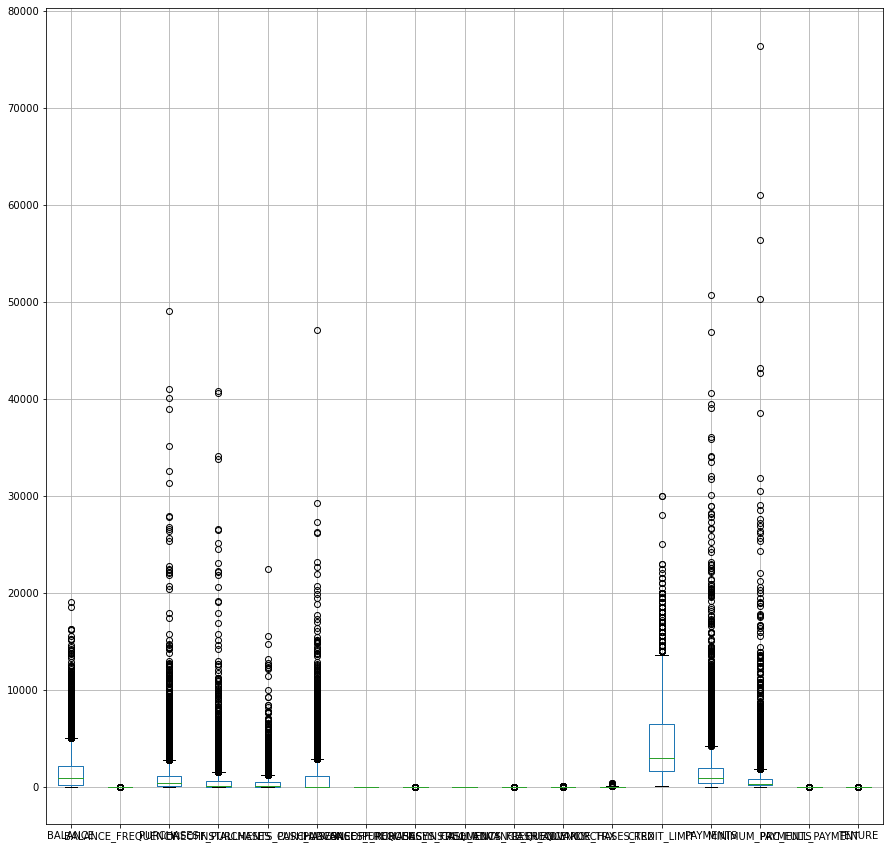

In [10]:
data.boxplot(column=[ 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],figsize=(15,15))

### Task 2: Cluster the creditcard users into sub-groups. Perform a statistical analysis of these grpuops.
* use a Scikit-Learn clustering algorithm of your choice to group the users 
* analyze the key differences between the user groups

In [11]:
ID=data.CUST_ID
dataWID = data.drop(["CUST_ID"],axis=1)

#display(ID.head())
#display(dataWID.head())

In [12]:
kmean=cluster.KMeans(n_clusters=6)
kmean.fit(dataWID)
labels=kmean.labels_


In [13]:
IDLabel = pd.DataFrame({"ID":ID,"label":labels})
IDLabel.head()

,ID,label
0,C10001,2
1,C10002,5
2,C10003,4
4,C10005,2
5,C10006,2


In [14]:
groups = IDLabel.groupby("label")

In [21]:
cosineSimilarity = metrics.pairwise.cosine_similarity(dataWID)
pca = PCA(2)
pca.fit(cosineSimilarity)
CStransformed = pca.transform(cosineSimilarity)
CStransformed.shape

(8636, 2)

In [31]:
x, y = CStransformed[:, 0], CStransformed[:, 1]

df =  pd.DataFrame({'x': x, 'y':y, 'label':labels})
groups = df.groupby("label")


No handles with labels found to put in legend.


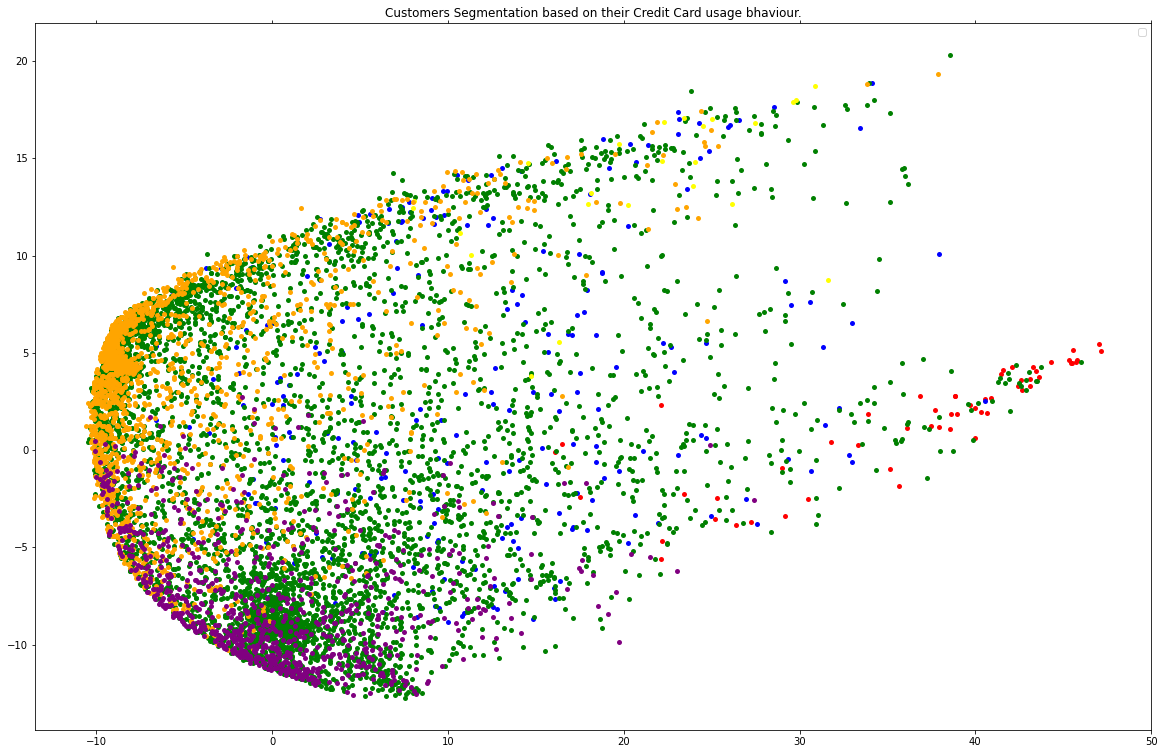

In [32]:
colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()